<a href="https://colab.research.google.com/github/manjulamishra/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

###Loading the data

In [2]:
# TODO
import pandas as pd
df_url  = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(df_url)
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


####Attribute table
Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

###checking for validation: no missing obs
Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
UCI raw data 306 rows and 4 columns

In [5]:
#same no of rows as in teh raw dataset. No missing obs
df.shape

(306, 4)

###attaching the column names

In [76]:
names = ['age', 'OP_year','Nodes', 'survival']
df = pd.read_csv(df_url, header =None, names = names)
df.head(5)

,age,OP_year,Nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


###changing the survival coding for surving >5 as 1 and <5 as 0

In [0]:
# import numpy as np
for row_no in np.arange(306):
  if df['survival'][row_no] == 2:
    df['survival'][row_no] = 0

###Changing Survival variable into 0 and 1 binary variable
The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

In [60]:
#printing first 10 observations
df.head(10)

,age,OP_year,Nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

###Summary statistics table 1

In [61]:
# TODO
#df.describe()
np.round(df.describe()) #rounds the numbers

,age,OP_year,Nodes,survival
count,306.0,306.0,306.0,306.0
mean,52.0,63.0,4.0,1.0
std,11.0,3.0,7.0,0.0
min,30.0,58.0,0.0,0.0
25%,44.0,60.0,0.0,0.0
50%,52.0,63.0,1.0,1.0
75%,61.0,66.0,4.0,1.0
max,83.0,69.0,52.0,1.0


In [0]:
dir(df)

###Summary statistics table 2

In [63]:
#http://www.datasciencemadesimple.com/cross-tab-cross-table-python-pandas/
pd.crosstab(df.age, df.Nodes,margins=True)

Nodes,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,28,30,35,46,52,All
age,,,,,,,,,,,,,,,,,,,,,
30,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
31,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
33,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
34,2,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,7
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
36,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
37,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
38,3,2,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
39,4,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [0]:
pd.crosstab(df.age, df.survival,margins=True)

###Plot 1: Histogram representing the number of survivals vs non-survivals

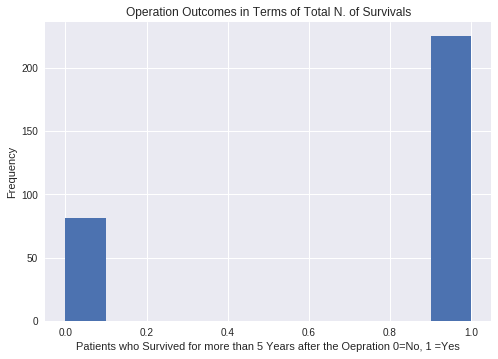

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df['survival'])
plt.title('Operation Outcomes in Terms of Total N. of Survivals')
plt.ylabel('Frequency')
plt.xlabel("Patients who Survived for more than 5 Years after the Oepration 0=No, 1 =Yes")
plt.show()

###Plot 2:


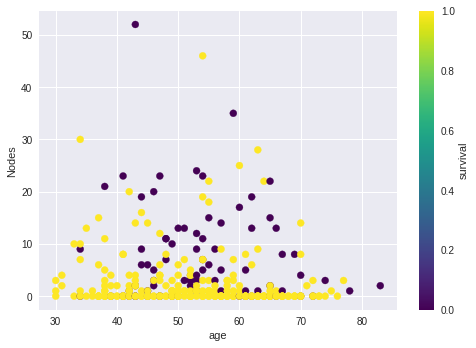

In [64]:

plt.scatter(df['age'],df['Nodes'], c=df['survival'],
            cmap = 'viridis');
plt.xlabel('age')
plt.ylabel('Nodes')
plt.colorbar().set_label('survival')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

####What is at least one feature that looks to have a positive correlation with survival?
Age and survival seems to have a slightly positive relationship.

In [80]:
#numpy.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)[source]
np.corrcoef(df['age'], df['survival'])



array([[1.        , 0.06795032],
       [0.06795032, 1.        ]])

####What is at least one feature that looks to have a negative correlation with survival?
Nodes which is (Number of positive axillary nodes detected) basically the number of lymph nodes found in patients has a negative correlation with surival. The correlation is significant at 28%. More the lymph nodes in a patient, less the chances or survival. lymph node

In [73]:
np.corrcoef(df['Nodes'], df['survival'])

array([[ 1.        , -0.28676757],
       [-0.28676757,  1.        ]])

####How are those two features related with each other, and what might that mean?
Number of lymph nodes and age also seem to have a very low negative correlation. It doesn't have a clear correlation. It might mean that you females age, there are less chances of them getting breast cancer. But then females in the middle age range seem to have a sightly higher Nodes.

In [78]:
np.corrcoef(df['Nodes'], df['age'])

array([[ 1.       , -0.0631761],
       [-0.0631761,  1.       ]])